In [1]:
import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
from keras.layers import Dropout,Concatenate,merge,BatchNormalization

In [3]:
from keras.optimizers import SGD

In [4]:
from keras.layers.merge import concatenate
from keras.metrics import categorical_accuracy

In [5]:
data=pd.read_csv("/Users/Mainaki Saraf/Desktop/clustering/clusters.csv",encoding="ISO-8859-1",low_memory=False)

In [6]:
data['target'] = data.CLUSTER.astype('category').cat.codes

In [7]:
num_class = len(np.unique(data.CLUSTER.values))
y = data['target'].values

In [8]:
MAX_LENGTH = 100
tokenizer = Tokenizer(split='\n')
tokenizer.fit_on_texts(data.STATE.values)
post_seq = tokenizer.texts_to_sequences(data.STATE.values)
data["STATE"]=pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [9]:
MAX_LENGTH = 100
tokenizer2 = Tokenizer(split='\n')
tokenizer2.fit_on_texts(data.COVERAGE.values)
post_seq2 = tokenizer2.texts_to_sequences(data.COVERAGE.values)
data["COVERAGE"]=pad_sequences(post_seq2, maxlen=MAX_LENGTH)

In [10]:
MAX_LENGTH = 100
tokenizer3 = Tokenizer(split='\n')
tokenizer3.fit_on_texts(data.IPOLNO.values)
post_seq3 = tokenizer3.texts_to_sequences(data.IPOLNO.values)
data["IPOLNO"]=pad_sequences(post_seq3, maxlen=MAX_LENGTH)

In [11]:
MAX_LENGTH = 100
tokenizer4 = Tokenizer(split='\n')
tokenizer4.fit_on_texts(data.OCCURRENCE.values)
post_seq4 = tokenizer4.texts_to_sequences(data.OCCURRENCE.values)
data["OCCURRENCE"] = pad_sequences(post_seq4, maxlen=MAX_LENGTH)

In [12]:
x_data=np.array(data.drop(["CLUSTER","target","DRIVERAGE","YORKPAID","VEHAGE"],axis=1))
#x_num=np.array(data["DRIVERAGE"])
x_num=np.array(data.drop(["STATE","COVERAGE","CLUSTER","target","OCCURRENCE","IPOLNO"],axis=1))

In [13]:
x_data=np.array_split(x_data,15)
x_num=np.array_split(x_num,15)
y=np.array_split(y,15)

In [14]:
len(y[0])

816

In [15]:
#input 1- categorical features as input
visible1 = Input(shape=(4,))
embedding_layer = Embedding(4,128,input_length=4)(visible1)
v1 = Flatten()(embedding_layer)

In [16]:
#input 2 - numerical features as input
#visible2 = Input(shape=(1,))
#visible2 = Input(shape=(2,))
visible2 = Input(shape=(3,))

In [17]:
merge = concatenate([v1, visible2])

In [18]:
x= Dense(7,activation='relu')(merge)
x=BatchNormalization()(x)
x= Dense(25,activation='relu')(x)
x= Dense(20,activation='relu')(x)
x=Dropout(0.05)(x)
x= Dense(15,activation='relu')(x)
x = Dense(10, activation='relu')(x)
x = Dense(5, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)

In [19]:
model = Model(inputs=[visible1,visible2], outputs=predictions)

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[categorical_accuracy])
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['mse'])

In [21]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 4)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 4, 128)       512         input_1[0][0]                    
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 512)          0           embedding_1[0][0]                
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 3)            0                                            
__________________________________________________________________________________________________
concatenat

In [29]:
filepath="weights-simple56.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


In [30]:
for i in range(5,10):
        X_train, X_test, y_train, y_test = train_test_split(x_data[i], y[i], test_size=0.05,random_state=42)
        X_train1, X_test1, y_train1, y_test1= train_test_split(x_num[i], y[i], test_size=0.05,random_state=42)
        history = model.fit([X_train,X_train1], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.15, shuffle=True, epochs=70, callbacks=[checkpointer])

Train on 657 samples, validate on 117 samples
Epoch 1/70
657/657 [==============================] - 0s 148us/step - loss: 1.3629 - acc: 0.3105 - val_loss: 1.3648 - val_acc: 0.2906

Epoch 00001: val_acc improved from -inf to 0.29060, saving model to weights-simple56.hdf5
Epoch 2/70
657/657 [==============================] - 0s 89us/step - loss: 1.3560 - acc: 0.3090 - val_loss: 1.3614 - val_acc: 0.2991

Epoch 00002: val_acc improved from 0.29060 to 0.29915, saving model to weights-simple56.hdf5
Epoch 3/70
657/657 [==============================] - 0s 77us/step - loss: 1.3541 - acc: 0.3105 - val_loss: 1.3604 - val_acc: 0.2991

Epoch 00003: val_acc did not improve from 0.29915
Epoch 4/70
657/657 [==============================] - 0s 66us/step - loss: 1.3534 - acc: 0.3135 - val_loss: 1.3577 - val_acc: 0.2991

Epoch 00004: val_acc did not improve from 0.29915
Epoch 5/70
657/657 [==============================] - 0s 55us/step - loss: 1.3517 - acc: 0.3135 - val_loss: 1.3557 - val_acc: 0.2991



In [371]:
#filepath="weights-simple16.hdf5"

In [372]:
#checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [373]:
#X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.05)
#X_train1, X_test1, y_train1, y_test1= train_test_split(x_num, y, test_size=0.05)

In [374]:
#history = model.fit([X_train,X_train1], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.15, shuffle=True, epochs=70, callbacks=[checkpointer])

In [31]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

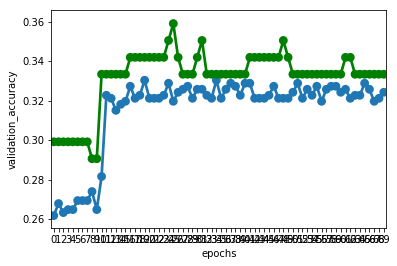

In [32]:
plt.show()

In [33]:
from tkinter import *

In [34]:
def pred(string):
    test=pd.read_csv(string,encoding="ISO-8859-1",low_memory=False)
    
    MAX_LENGTH = 100
    state=list(test.STATE)
    tokenizer = Tokenizer(split='\n')
    tokenizer.fit_on_texts(test.STATE.values)
    post_seq = tokenizer.texts_to_sequences(test.STATE.values)
    test["STATE"]=pad_sequences(post_seq, maxlen=MAX_LENGTH)
    
    MAX_LENGTH = 100
    cov=list(test.COVERAGE)
    tokenizer2 = Tokenizer(split='\n')
    tokenizer2.fit_on_texts(test.COVERAGE.values)
    post_seq2 = tokenizer2.texts_to_sequences(test.COVERAGE.values)
    test["COVERAGE"]=pad_sequences(post_seq2, maxlen=MAX_LENGTH)
    
    MAX_LENGTH = 100
    ipolno=list(test.IPOLNO)
    tokenizer3 = Tokenizer(split='\n')
    tokenizer3.fit_on_texts(test.IPOLNO.values)
    post_seq3 = tokenizer3.texts_to_sequences(test.IPOLNO.values)
    test["IPOLNO"]=pad_sequences(post_seq3, maxlen=MAX_LENGTH)
    
    MAX_LENGTH = 100
    occ=list(test.OCCURRENCE)
    tokenizer4 = Tokenizer(split='\n')
    tokenizer4.fit_on_texts(test.OCCURRENCE.values)
    post_seq4 = tokenizer4.texts_to_sequences(test.OCCURRENCE.values)
    test["OCCURRENCE"] = pad_sequences(post_seq4, maxlen=MAX_LENGTH)
    
    x_data1=np.array(test.drop(["DRIVERAGE","YORKPAID","VEHAGE","PCLUSTER"],axis=1))
    #x_num=np.array(data["DRIVERAGE"])
    x_num1=np.array(test.drop(["STATE","COVERAGE","OCCURRENCE","IPOLNO","PCLUSTER"],axis=1))
    
    a={0:'A',1:'B',2:'C',3:'D'}
    
    yp=model.predict([x_data1,x_num1])
    
    print(yp)
    
    y_classes = yp.argmax(axis=-1)
    
    print(y_classes)
    
    for i in range(len(y_classes)):
        test["STATE"][i]=state[i]
        test["COVERAGE"][i]=cov[i]
        test["IPOLNO"][i]=ipolno[i]
        test["OCCURRENCE"][i]=occ[i]
        #print(y_classes[i],a[y_classes[i]])
        test["PCLUSTER"][i]=a[y_classes[i]]
        
    pd.set_option('display.expand_frame_repr', False)    
        
    print(test)
    
    return test

In [35]:
def printtext():
    global entry_1
    global string
    string = entry_1.get() 
    accept=pred(string)
    text.insert(INSERT, accept)

from tkinter import *
root = Tk()
root.title('Claims Prediction')
text = Text(root)
label_1=Label(root,text="Enter File Path")
entry_1=Entry(root)
label_1.pack()
entry_1.pack()
entry_1.focus_set()
b = Button(root,text='Enter',command=printtext)
b.pack(side=TOP)
text.pack(expand=True, fill='both')

root.mainloop()

[[0.20786048 0.2675441  0.31526864 0.20932683]
 [0.35762268 0.2602838  0.2658065  0.11628701]
 [0.20786048 0.2675441  0.31526864 0.20932683]
 [0.20786048 0.2675441  0.31526864 0.20932683]
 [0.20786048 0.2675441  0.31526864 0.20932683]
 [0.20786048 0.2675441  0.31526864 0.20932683]
 [0.20786048 0.2675441  0.31526864 0.20932683]
 [0.20786048 0.2675441  0.31526864 0.20932683]
 [0.20786048 0.2675441  0.31526864 0.20932683]
 [0.20786048 0.2675441  0.31526864 0.20932683]
 [0.20786048 0.2675441  0.31526864 0.20932683]
 [0.35226142 0.26110432 0.26786917 0.11876506]
 [0.33186844 0.26391608 0.27557838 0.1286371 ]]
[2 0 2 2 2 2 2 2 2 2 2 0 0]


C:\Users\Mainaki Saraf\Anaconda3\lib\site-packages\ipykernel\__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Mainaki Saraf\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Mainaki Saraf\Anaconda3\lib\site-packages\ipykernel\__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Mainaki Saraf\Anaconda3\lib\site-packages\ipykernel\__main__.py:49: Se

   STATE            COVERAGE  DRIVERAGE  VEHAGE   IPOLNO OCCURRENCE  YORKPAID PCLUSTER
0     VA    BODILYINJURYAUTO         42       8  9384684  LXMS 3619    160650        C
1     VA  PROPERTYDAMAGEAUTO         40      11  9384684  LXMS 0874         0        A
2     NJ  PROPERTYDAMAGEAUTO         40       7  7279901  LXMS 1599     74688        C
3     NJ           COLLISION         40       7  7279901  LXMS 1599     74688        C
4     NJ  PROPERTYDAMAGEAUTO         33       5  7279901  LXMS 1073     73224        C
5     PA           COLLISION         40       1  3484343  LXMS 3293     44778        C
6     PA           COLLISION         40       7  3484343  LXMS 2725     43900        C
7     PA  PROPERTYDAMAGEAUTO         40       8  3484343  LXMS 3598     44778        C
8     PA  PROPERTYDAMAGEAUTO         40       8  3484343  LXMS 1255     73224        C
9     PA  PROPERTYDAMAGEAUTO         40       9  3484343  LXMS 4129     44778        C
10    PA    BODILYINJURYAUTO         41    